## Importacion de Modulos y Archivo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

In [2]:
df = pd.read_csv('caudal_extra.csv')
df['fecha'] = df['fecha'].astype('datetime64')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411180 entries, 0 to 1411179
Data columns (total 17 columns):
Unnamed: 0                1411180 non-null int64
codigo_estacion           1411180 non-null int64
institucion               1411180 non-null object
fuente                    1411180 non-null object
nombre                    1411180 non-null object
altura                    1411180 non-null int64
latitud                   1411180 non-null float64
longitud                  1411180 non-null float64
codigo_cuenca             1411180 non-null int64
nombre_sub_cuenca         1411180 non-null object
cantidad_observaciones    1411180 non-null int64
fecha                     1411180 non-null datetime64[ns]
caudal                    1411180 non-null float64
gauge_id                  1411180 non-null int64
gauge_name                1411180 non-null object
precip_promedio           1383413 non-null float64
temp_max_promedio         1259617 non-null float64
dtypes: datetime64[ns](1), flo

In [4]:
df.head()

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
0,0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06,0.812,4540001,Rio Grande En Paloma 1,0.0,NaN
1,1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27,0.236,4540001,Rio Grande En Paloma 1,0.0,NaN
2,2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07,0.730,4540001,Rio Grande En Paloma 1,0.0,NaN
3,3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30,3.590,4540001,Rio Grande En Paloma 1,0.0,NaN
4,4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22,1.370,4540001,Rio Grande En Paloma 1,0.0,NaN


## 2. Datos, Distribuciones y Missing Values

In [5]:
display(df.isnull().sum())

Unnamed: 0                     0
codigo_estacion                0
institucion                    0
fuente                         0
nombre                         0
altura                         0
latitud                        0
longitud                       0
codigo_cuenca                  0
nombre_sub_cuenca              0
cantidad_observaciones         0
fecha                          0
caudal                         0
gauge_id                       0
gauge_name                     0
precip_promedio            27767
temp_max_promedio         151563
dtype: int64

In [6]:
#Numero de Nulls por year
df[['temp_max_promedio','caudal']].isnull().groupby([df.fecha.dt.year]).sum().astype(int)

,temp_max_promedio,caudal
fecha,,
1960,9672,0
1961,9518,0
1962,8800,0
1963,11349,0
1964,11424,0
1965,5929,0
1966,5353,0
1967,5272,0
1968,5651,0


### Podemos observas que los missing values se concentran en las mediciones de temperatura y precipitaciones. No existen datos nulos en los datos de caudal. Esto puede ser que se tomo como base la BBDD de caudales de los rios y no todos tenian una estacion de temperatura y/o precipitacion asociada. Ademas, los nulos varian en el tiempo, esto podria significar que se agregan cuencas en la BBDD principal, sin existir datos de precipitaciones y temperatura.


### Distribucion

In [7]:
print(df.caudal.mean())
print(df.caudal.std())

95.52228796469313
252.63374947556747


In [8]:
np.percentile(df.caudal, 95)

523.0

Ver los datos agregados no claro. Hay que separar los datos por rio y estacion.

In [9]:
# funcion para agregar estacion 

def estacion(row):
    fecha = row[11].timetuple().tm_yday
    
    otono = range(80, 172)
    invierno = range(172, 264)
    primavera = range(264, 355)
    
    if fecha in otono:
        return 'otono'  
    elif fecha in invierno:
        return 'invierno'
    elif fecha in primavera:
        return 'primavera'
    else:
        return 'verano'

df['estacion'] = df.apply(estacion,axis = 1)

In [10]:
df_plot = df[['caudal','codigo_cuenca','estacion']].copy()

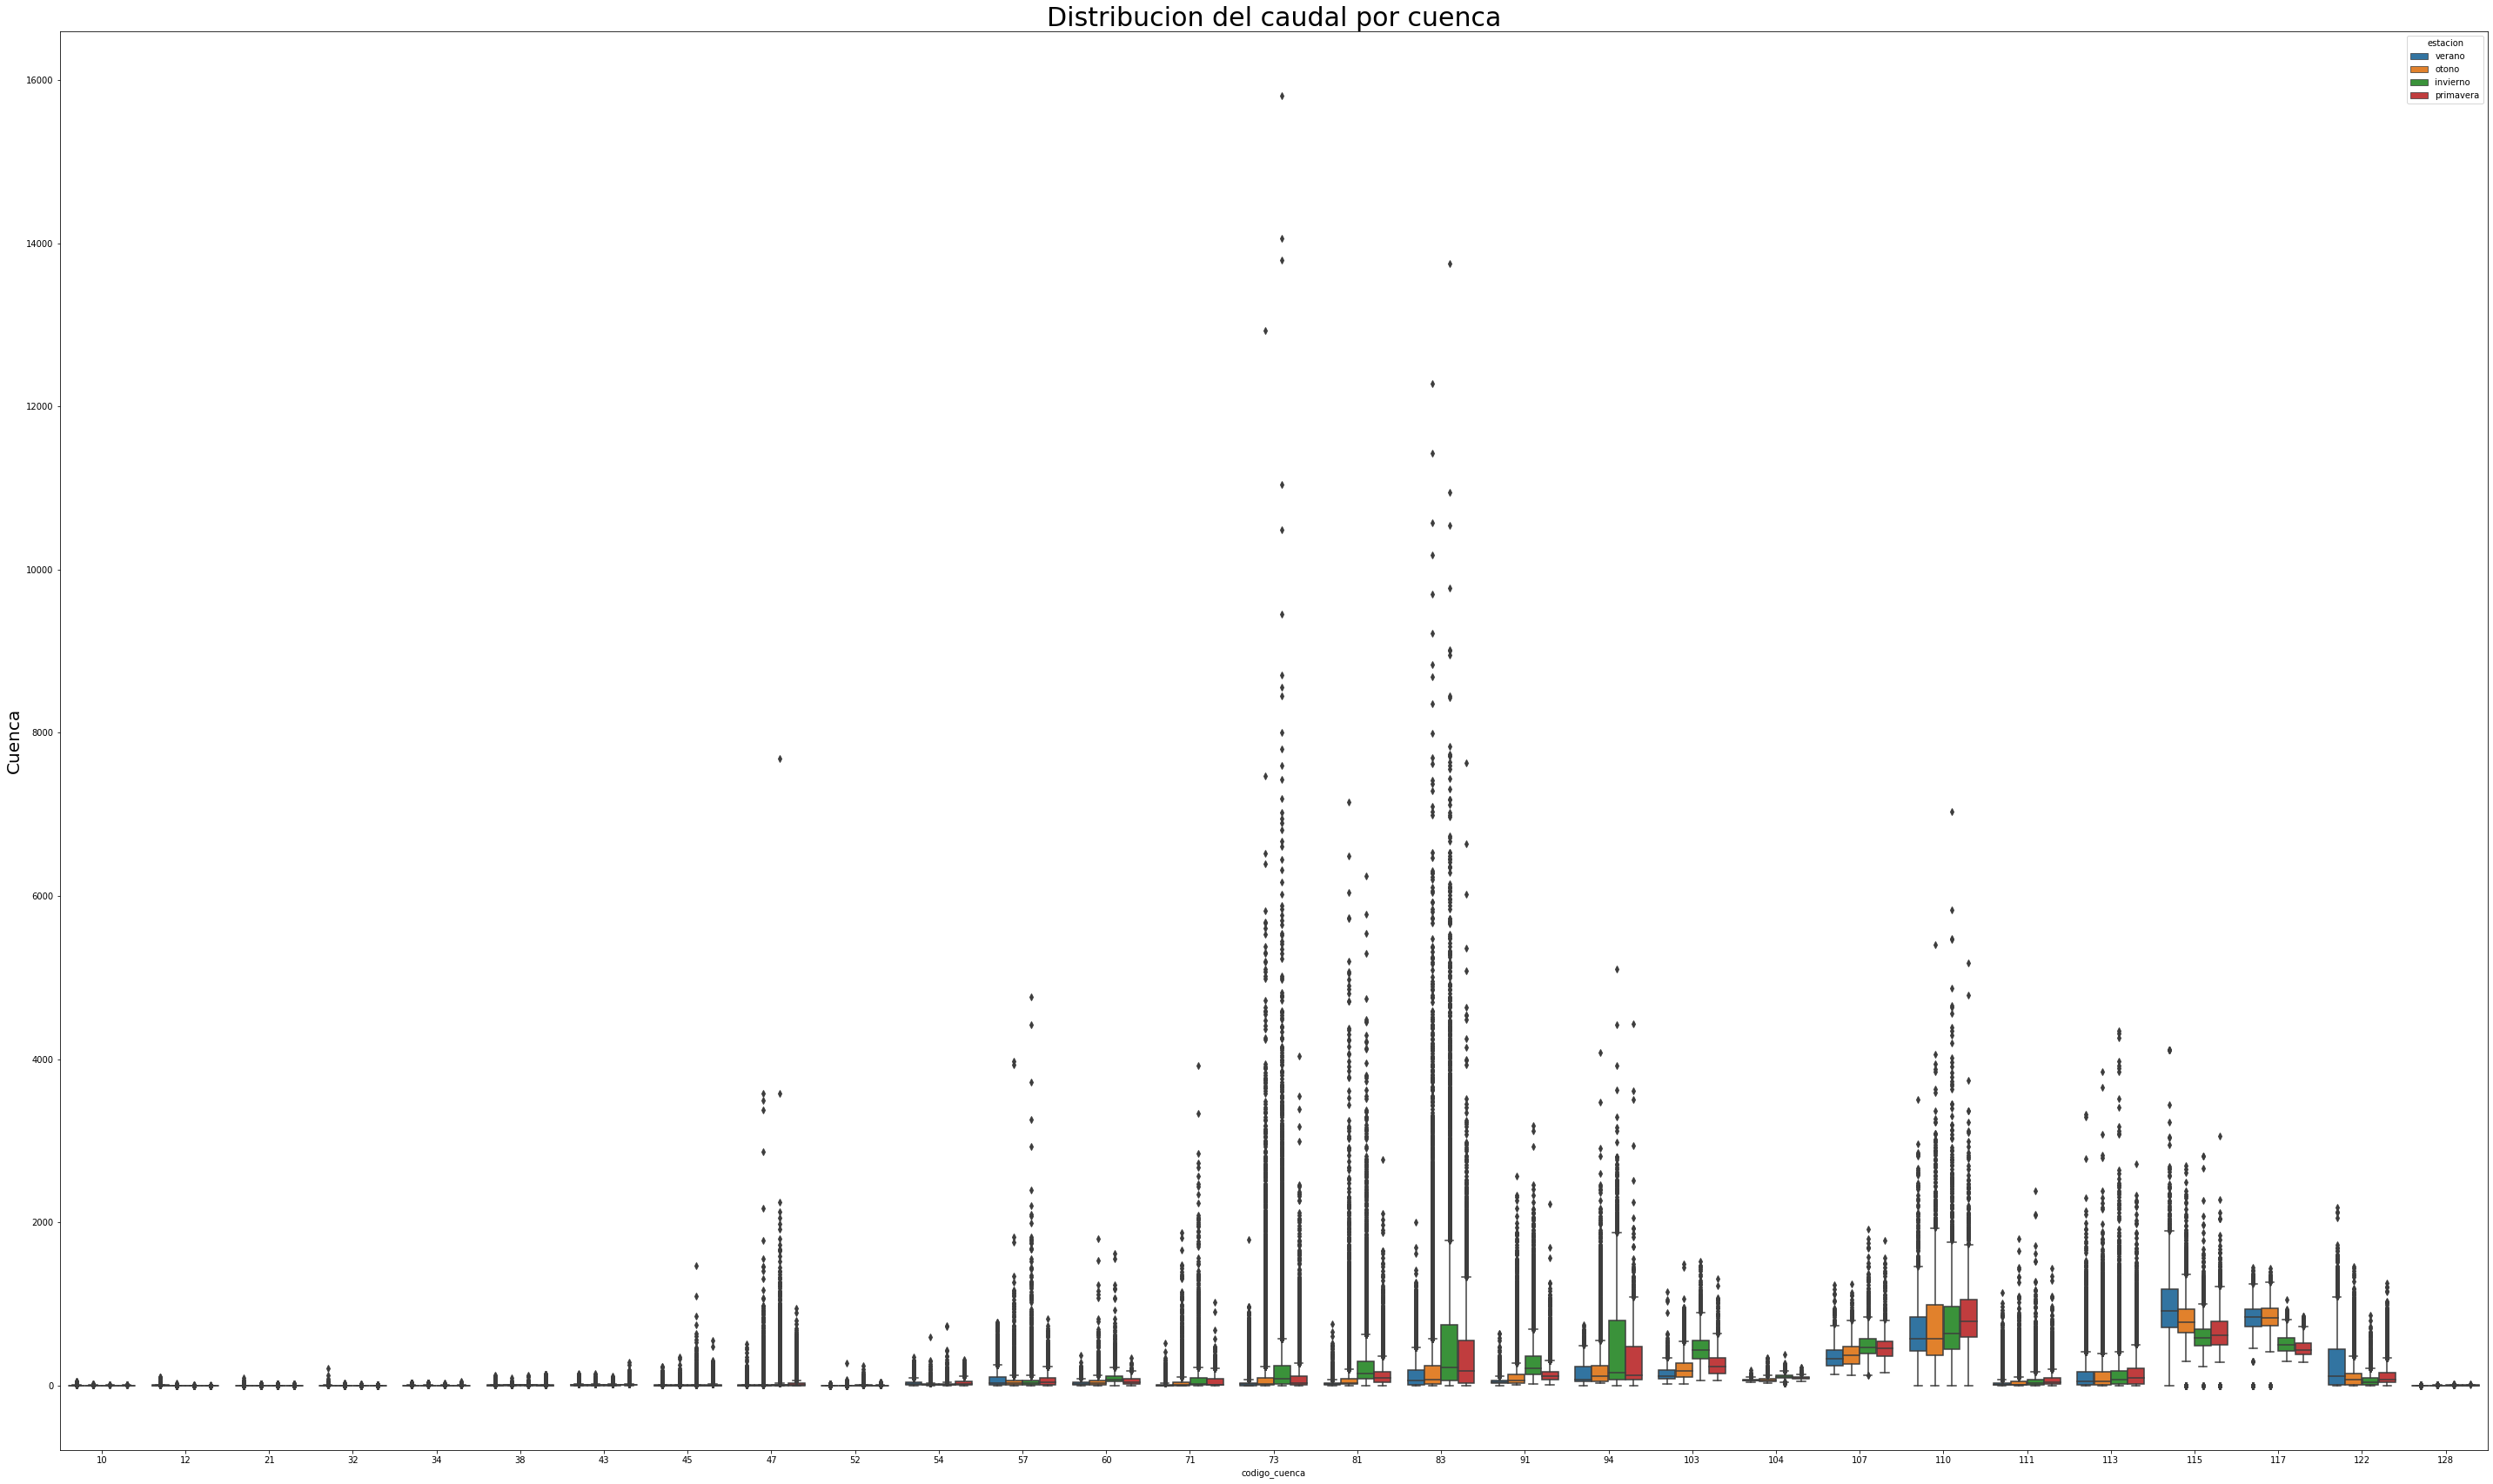

In [11]:
df_plot = df[['caudal','codigo_cuenca','estacion']].copy()

plt.figure(figsize=(50,30))
sns.boxplot(y='caudal',data=df_plot,x='codigo_cuenca',hue='estacion')
plt.ylabel('Cuenca',fontsize=20)
plt.title('Distribucion del caudal por cuenca',fontsize=30)
plt.show()

### Podemos ver que las diferencias entre cada uno de los caudales es importante, ademas de que por estacion se puede ver una gran cantidad de outliers.

## 3. Plots a traves de funciones

/Users/Sebastian/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


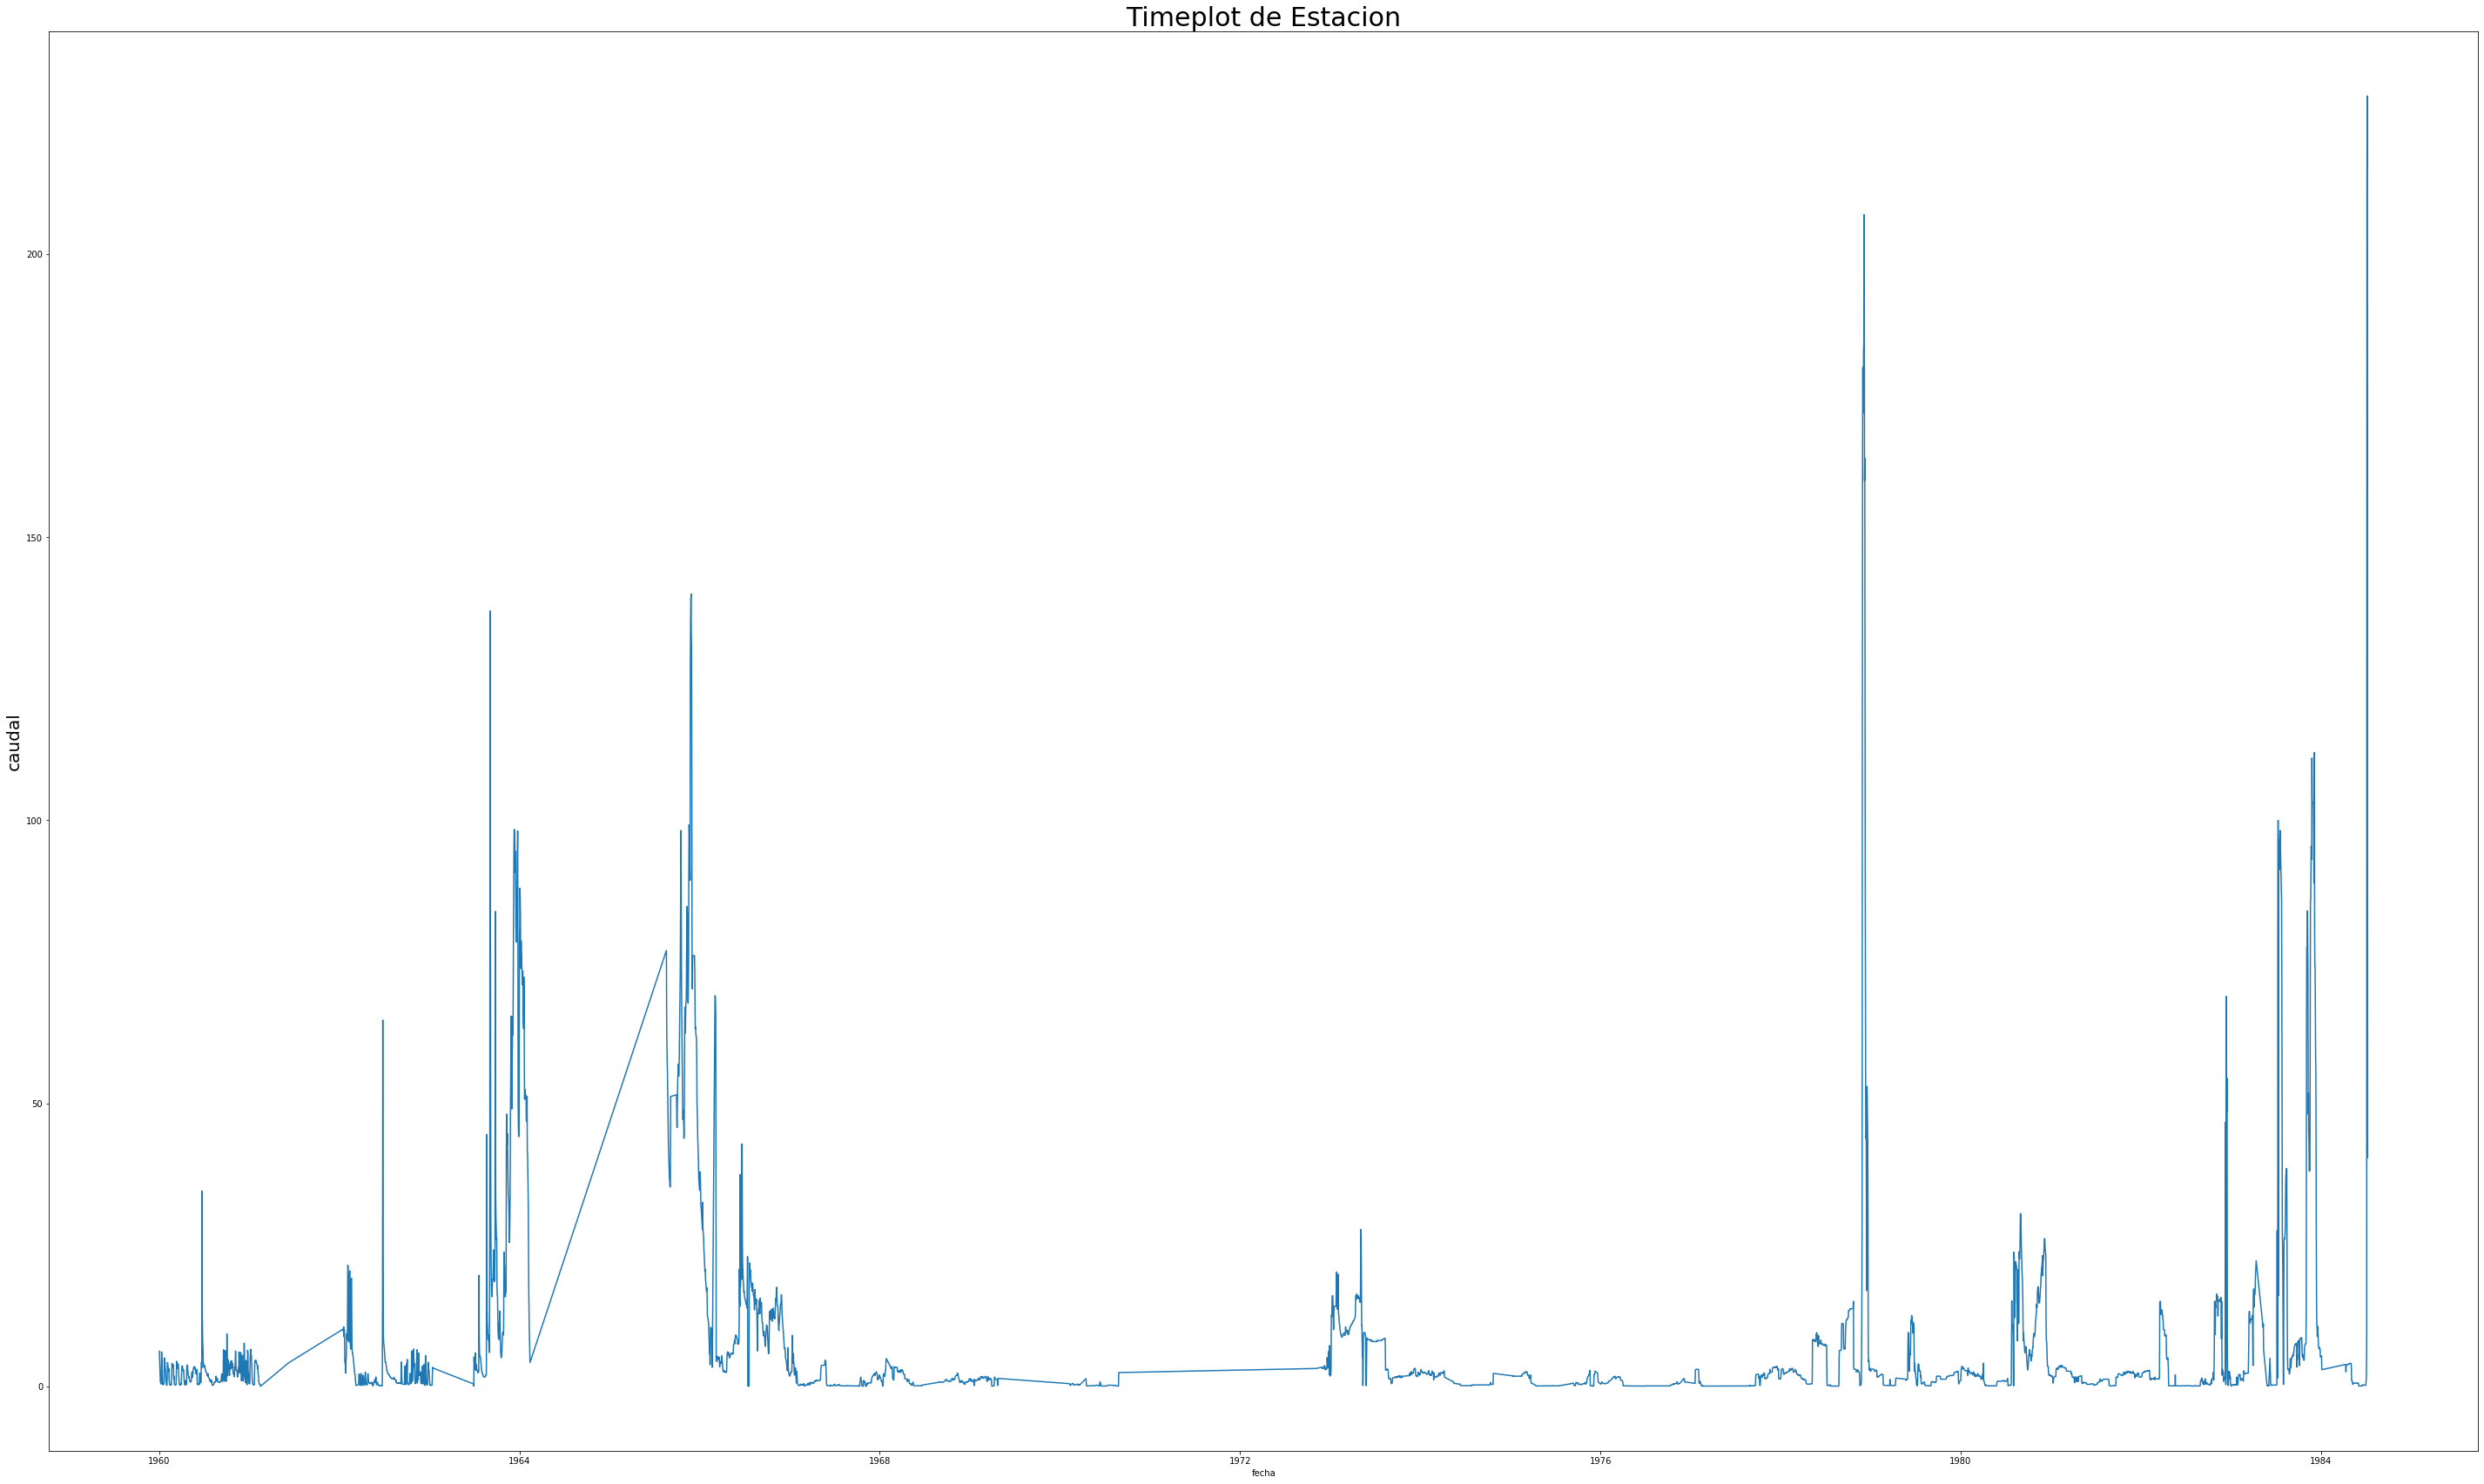

In [12]:
# a. 
def time_plot_una_estacion(codigo_estacion, columna, fecha_min, fecha_max):
    if type(codigo_estacion) != int:
        print('Codigo estacion debe ser numero')
        return
    if type(columna) != str:
        print('columa debe ser string')  
        return
    filtro = (df['codigo_estacion']==codigo_estacion) & (df['fecha']>=fecha_min) & (df['fecha']<=fecha_max)   
    df_filter = df[filtro].copy()
    
    plt.figure(figsize=(50,30))
    sns.lineplot(x="fecha", y=columna,data=df_filter)
    plt.ylabel(columna,fontsize=20)
    plt.title('Timeplot de Estacion',fontsize=30)
    plt.show()
    
time_plot_una_estacion(4540001,'caudal','1960-01-01','2010-01-01')

In [13]:
# b. Se estandarizo cada columan en rango [0,1]
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
def time_plot_estaciones_varias_columnas(codigo_estacion, columnas, fecha_min, fecha_max):
    if type(codigo_estacion) != int:
        print('Codigo estacion debe ser numero')
        return
    if type(columnas) != list:
        print('columa debe ser una lista')    
        return
    filtro = (df['codigo_estacion']==codigo_estacion) & (df['fecha']>=fecha_min) & (df['fecha']<=fecha_max)   
    df_filter = df[filtro].copy()
    df_filter.set_index(keys='fecha',inplace=True)
    df_filter_2 = df_filter[columnas].copy()
    df_filter_3 = min_max_scaler.fit_transform(df_filter_2)
    
    df_filter_4 = pd.DataFrame(df_filter_3,columns=columnas)

    df_filter_4.plot(y=columnas,figsize=(50,30))
    #plt.plot_date("fecha", columnas[0],data=df_filter,linestyle='solid')
    plt.ylabel(columnas,fontsize=20)
    plt.title('Timeplot de Estacion',fontsize=30)
    plt.show()

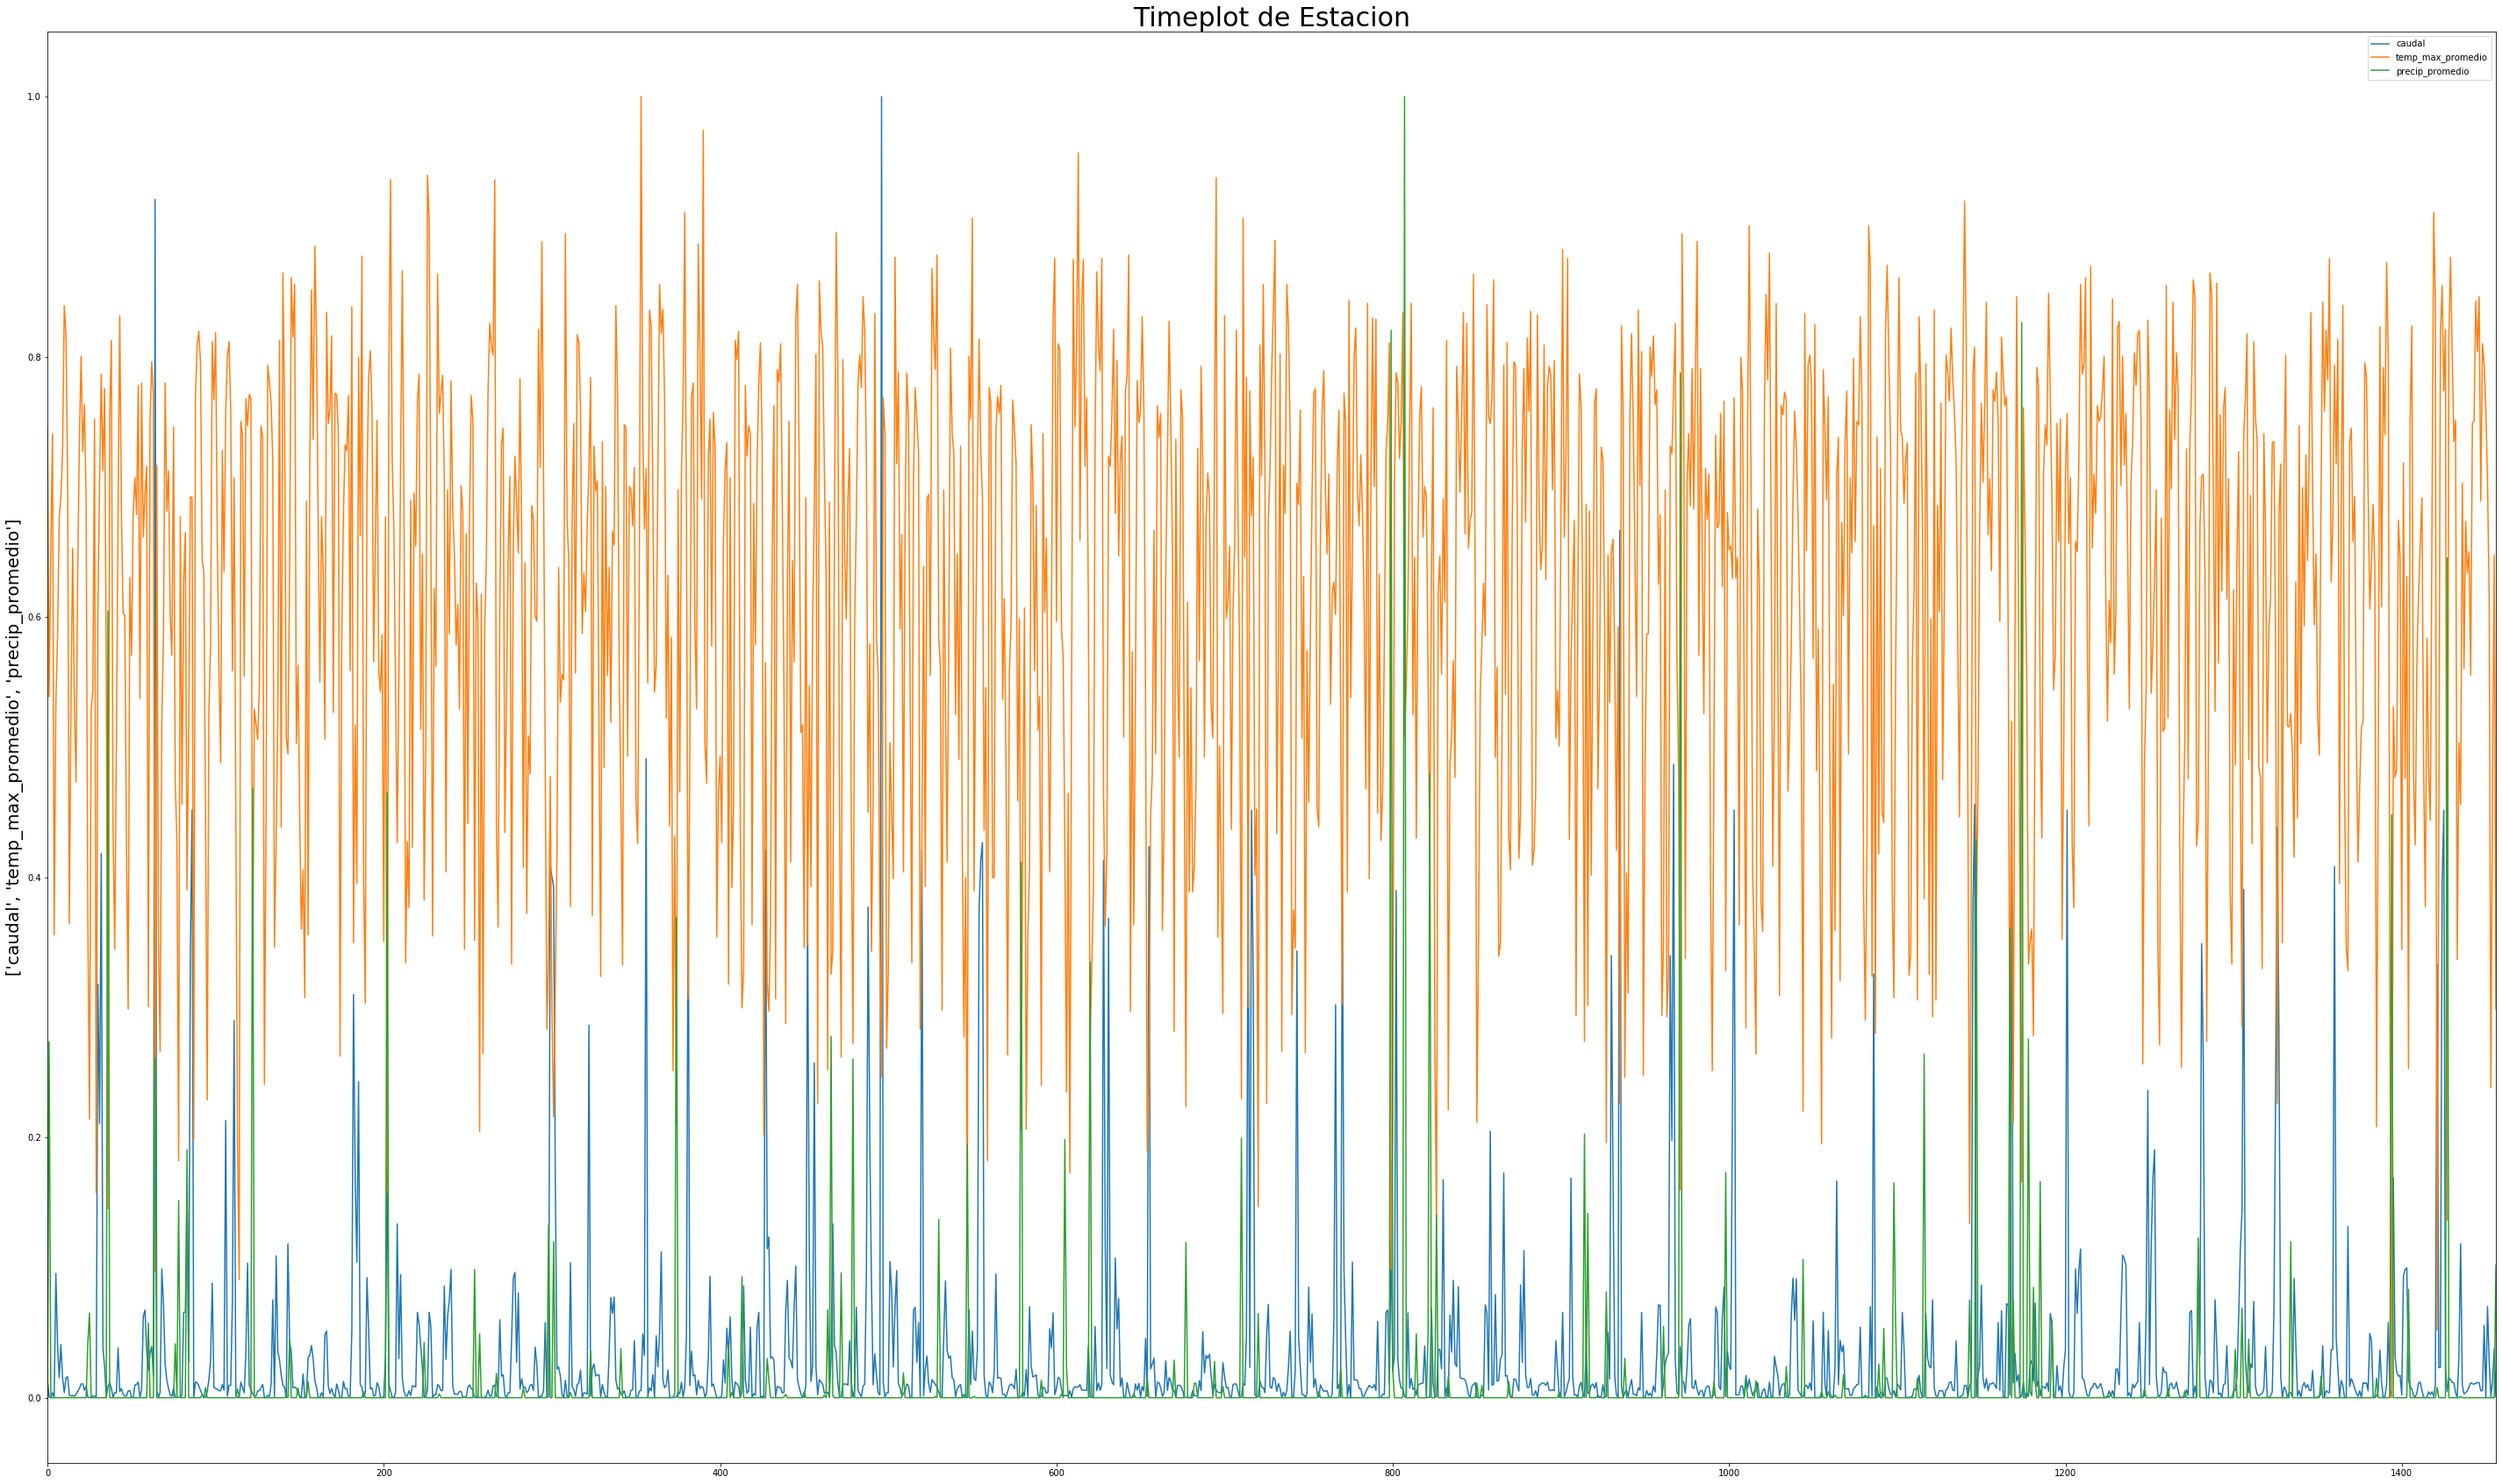

In [14]:
time_plot_estaciones_varias_columnas(4540001,['caudal','temp_max_promedio','precip_promedio'],'1980-01-01','2010-01-01')

## 4. Creacion de Variables Extremas

In [15]:
#obtencion de percentiles por estacion de clima y cuenca
percentiles = df.groupby(['estacion','codigo_estacion'])[['caudal','temp_max_promedio','precip_promedio']].quantile(.95)
percentiles.head(20)

0.95                       caudal  temp_max_promedio  precip_promedio
estacion codigo_estacion                                             
invierno 1020003          0.20990          13.850000         0.000000
         1021001          2.66000          13.500000         0.000000
         1050004          0.39160          16.500000         0.000000
         1211001          1.62800          17.000000         0.000000
         2103003          0.17100          16.000000         0.000000
         2104002          0.95235          20.533333         0.000000
         2104003          1.18000          19.799999         0.000000
         2105001          0.47820          17.799999         0.000000
         2105002          0.70065          18.100000         0.000000
         2105005          0.76130          19.971667         0.000000
         2105007          0.52900          14.600000         0.000000
         2110001          3.19000          20.376250         0.050000
         2110002          3.29150          19.495714         0.009243
         2110004          1.64000          20.179653         0.027778
         2110031          3.69000          18.480667         0.100000
         2112005          1.01250          21.110000         0.010552
         2112006          3.45500          21.200001         0.045455
         2112007          1.19000          21.055000         0.045455
         2120001          0.73640          20.914243         0.038030
         3430001          3.17000          31.650000         0.000000

In [16]:
#se cruzan los dataframes
df_con_percentiles = df.join(percentiles,on=['estacion','codigo_estacion'], rsuffix='_percentil').copy()
df_con_var_extremos_corto = df_con_percentiles[['codigo_estacion','nombre','codigo_cuenca','fecha','cantidad_observaciones','caudal','precip_promedio', 'temp_max_promedio', 'estacion', 'caudal_percentil','temp_max_promedio_percentil', 'precip_promedio_percentil']].copy()
df_con_var_extremos_corto.head(10)

,codigo_estacion,nombre,codigo_cuenca,fecha,cantidad_observaciones,caudal,precip_promedio,temp_max_promedio,estacion,caudal_percentil,temp_max_promedio_percentil,precip_promedio_percentil
0,4540001,Rio Grande En Paloma 1,45,1960-01-06,11575,0.812,0.0,NaN,verano,27.02,30.972000,0.000000
1,4540001,Rio Grande En Paloma 1,45,1960-03-27,11575,0.236,0.0,NaN,otono,11.70,28.900000,0.665909
2,4540001,Rio Grande En Paloma 1,45,1960-05-07,11575,0.730,0.0,NaN,otono,11.70,28.900000,0.665909
3,4540001,Rio Grande En Paloma 1,45,1960-06-30,11575,3.590,0.0,NaN,invierno,25.33,26.575001,7.156389
4,4540001,Rio Grande En Paloma 1,45,1960-07-22,11575,1.370,0.0,NaN,invierno,25.33,26.575001,7.156389
5,4540001,Rio Grande En Paloma 1,45,1960-07-27,11575,0.822,0.0,NaN,invierno,25.33,26.575001,7.156389
6,4540001,Rio Grande En Paloma 1,45,1960-09-16,11575,0.910,0.0,NaN,invierno,25.33,26.575001,7.156389
7,4540001,Rio Grande En Paloma 1,45,1960-10-31,11575,2.070,0.0,NaN,primavera,74.05,30.460999,0.000000
8,4540001,Rio Grande En Paloma 1,45,1960-11-26,11575,4.410,0.0,NaN,primavera,74.05,30.460999,0.000000
9,4540001,Rio Grande En Paloma 1,45,1960-12-04,11575,5.480,0.0,NaN,primavera,74.05,30.460999,0.000000


In [17]:
def caudal_extremos(row):
    caudal = row[5]
    caudal_percentil = row[9]
     
    if caudal > caudal_percentil:
        return 1
    else:
        return 0
    
def temp_extremos(row):
    temp = row[7]
    temp_percentil = row[10]
     
    if temp > temp_percentil:
        return 1
    else:
        return 0
    
def precip_extremos(row):
    precip = row[6]
    precip_percentil = row[11]
     
    if precip > precip_percentil:
        return 1
    else:
        return 0
    
df_con_var_extremos_corto['caudal_extremo'] = df_con_var_extremos_corto.apply(caudal_extremos,axis = 1)
df_con_var_extremos_corto['temp_extremo'] = df_con_var_extremos_corto.apply(temp_extremos,axis = 1)
df_con_var_extremos_corto['precip_extremo'] = df_con_var_extremos_corto.apply(precip_extremos,axis = 1)

In [18]:
df_con_var_extremos_corto.head()

,codigo_estacion,nombre,codigo_cuenca,fecha,cantidad_observaciones,caudal,precip_promedio,temp_max_promedio,estacion,caudal_percentil,temp_max_promedio_percentil,precip_promedio_percentil,caudal_extremo,temp_extremo,precip_extremo
0,4540001,Rio Grande En Paloma 1,45,1960-01-06,11575,0.812,0.0,NaN,verano,27.02,30.972000,0.000000,0,0,0
1,4540001,Rio Grande En Paloma 1,45,1960-03-27,11575,0.236,0.0,NaN,otono,11.70,28.900000,0.665909,0,0,0
2,4540001,Rio Grande En Paloma 1,45,1960-05-07,11575,0.730,0.0,NaN,otono,11.70,28.900000,0.665909,0,0,0
3,4540001,Rio Grande En Paloma 1,45,1960-06-30,11575,3.590,0.0,NaN,invierno,25.33,26.575001,7.156389,0,0,0
4,4540001,Rio Grande En Paloma 1,45,1960-07-22,11575,1.370,0.0,NaN,invierno,25.33,26.575001,7.156389,0,0,0


In [19]:
#df_con_var_extremos_corto.set_index(keys='fecha',inplace=True)

## En general, parece correcta la medida para capturar un evento extremo. Pero supone que todas las cuencas tienen una distribución simétrica. En los casos de cuencas que tengan números muy altos, se podrían estar perdiendo eventos extremos con este corte con percentil 95.

## Otra manera de tomar evento extremo, sería tomando la media y sumandole una cantidad 'aceptable' de desviación de la media de la cuenca para esa estación.

## 5. Analisis variable Caudal Extremo

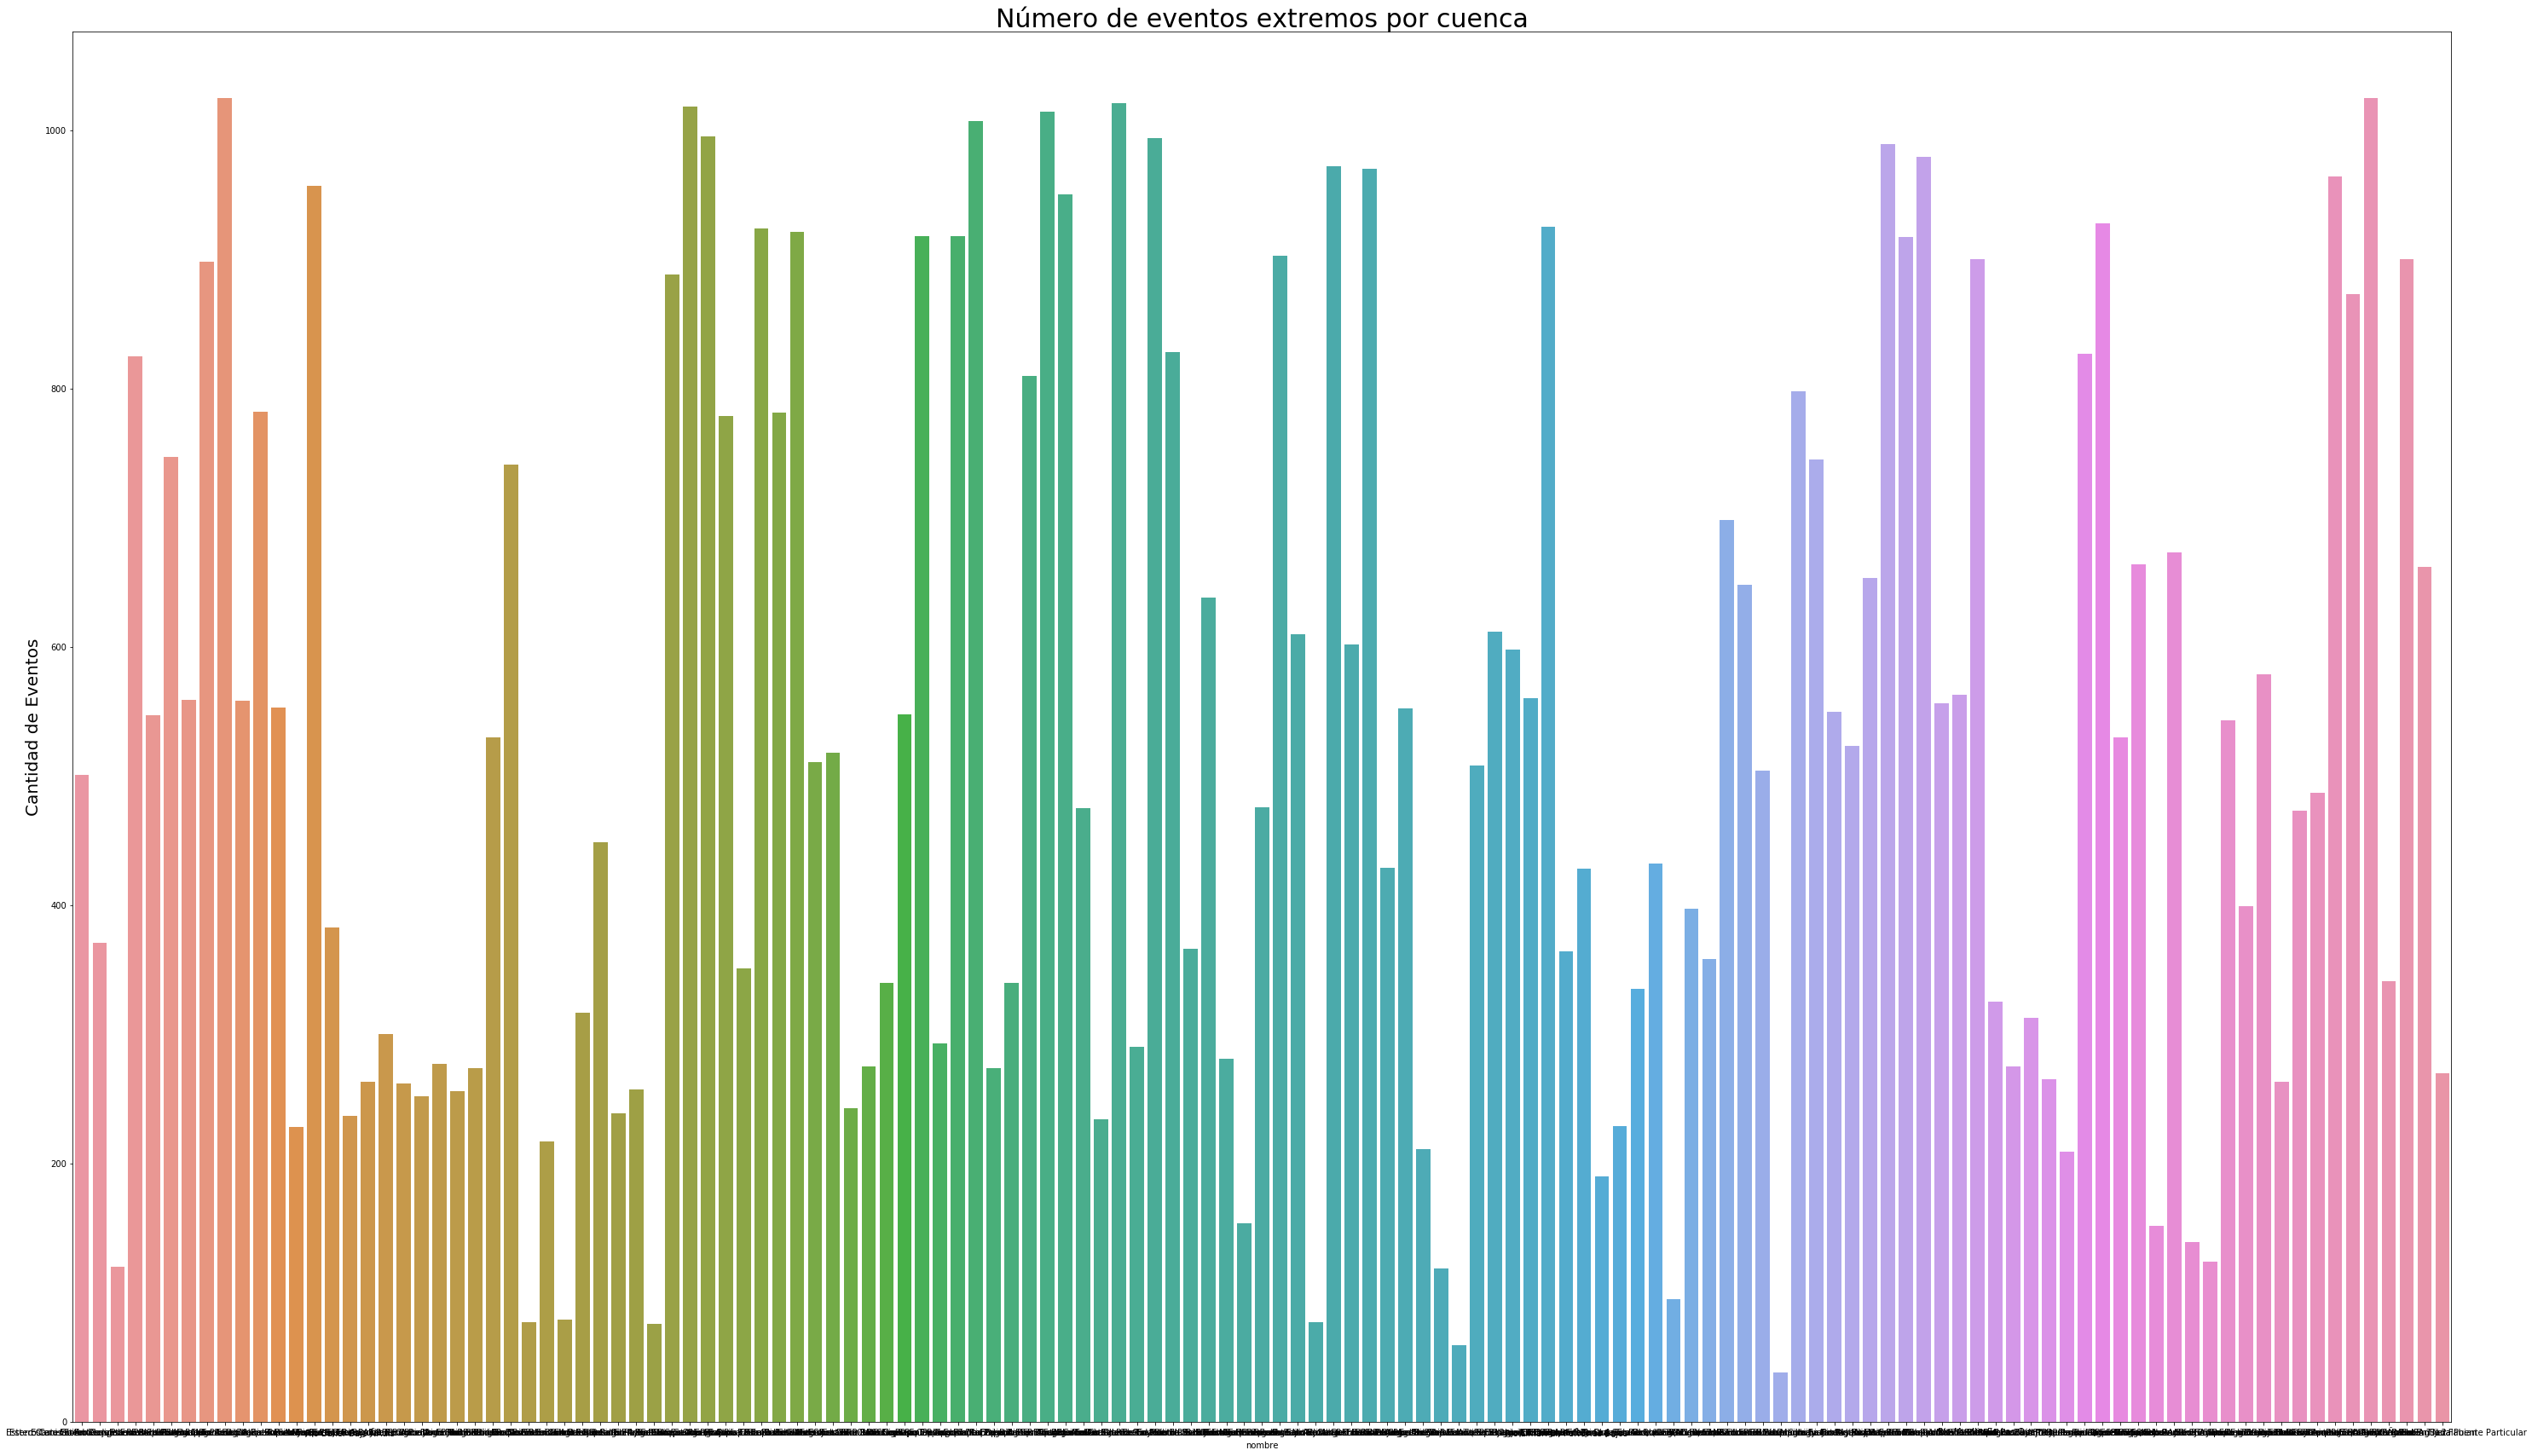

In [20]:
df_con_var_extremos_corto_2 = df_con_var_extremos_corto[['caudal_extremo','codigo_cuenca','nombre']].copy()
serie_suma_eventos = df_con_var_extremos_corto_2.groupby('nombre')['caudal_extremo'].sum()

df_suma_eventos = pd.DataFrame(serie_suma_eventos)
df_suma_eventos.reset_index(inplace=True)


plt.figure(figsize=(50,30))
sns.barplot(y='caudal_extremo',data=df_suma_eventos,x='nombre')
plt.ylabel('Cantidad de Eventos',fontsize=20)
plt.title('Número de eventos extremos por cuenca',fontsize=30)
plt.show()

### Se observa que la cantidad de eventos extremos  varia entre cuencas,  existe una gran diferencia entre el número mínimo y el máximo. Esto puede indicar que existen algunas cuencas con distribuciones de caudales distintas. 

## 6. Plot Eventos Extremos

In [21]:
plot_caudales=pd.pivot_table(df_con_var_extremos_corto,index=df_con_var_extremos_corto.fecha.dt.year,values='caudal_extremo',aggfunc=('sum','count'))
plot_temp=pd.pivot_table(df_con_var_extremos_corto,index=df_con_var_extremos_corto.fecha.dt.year,values='temp_extremo',aggfunc=('sum','count'))
plot_precip=pd.pivot_table(df_con_var_extremos_corto,index=df_con_var_extremos_corto.fecha.dt.year,values='precip_extremo',aggfunc=('sum','count'))

In [22]:
plot_caudales.columns

Index(['count', 'sum'], dtype='object')

In [23]:
plot_caudales['porcentaje'] = plot_caudales['sum']/plot_caudales['count']
plot_temp['porcentaje'] = plot_temp['sum']/plot_temp['count']
plot_precip['porcentaje'] = plot_precip['sum']/plot_precip['count']

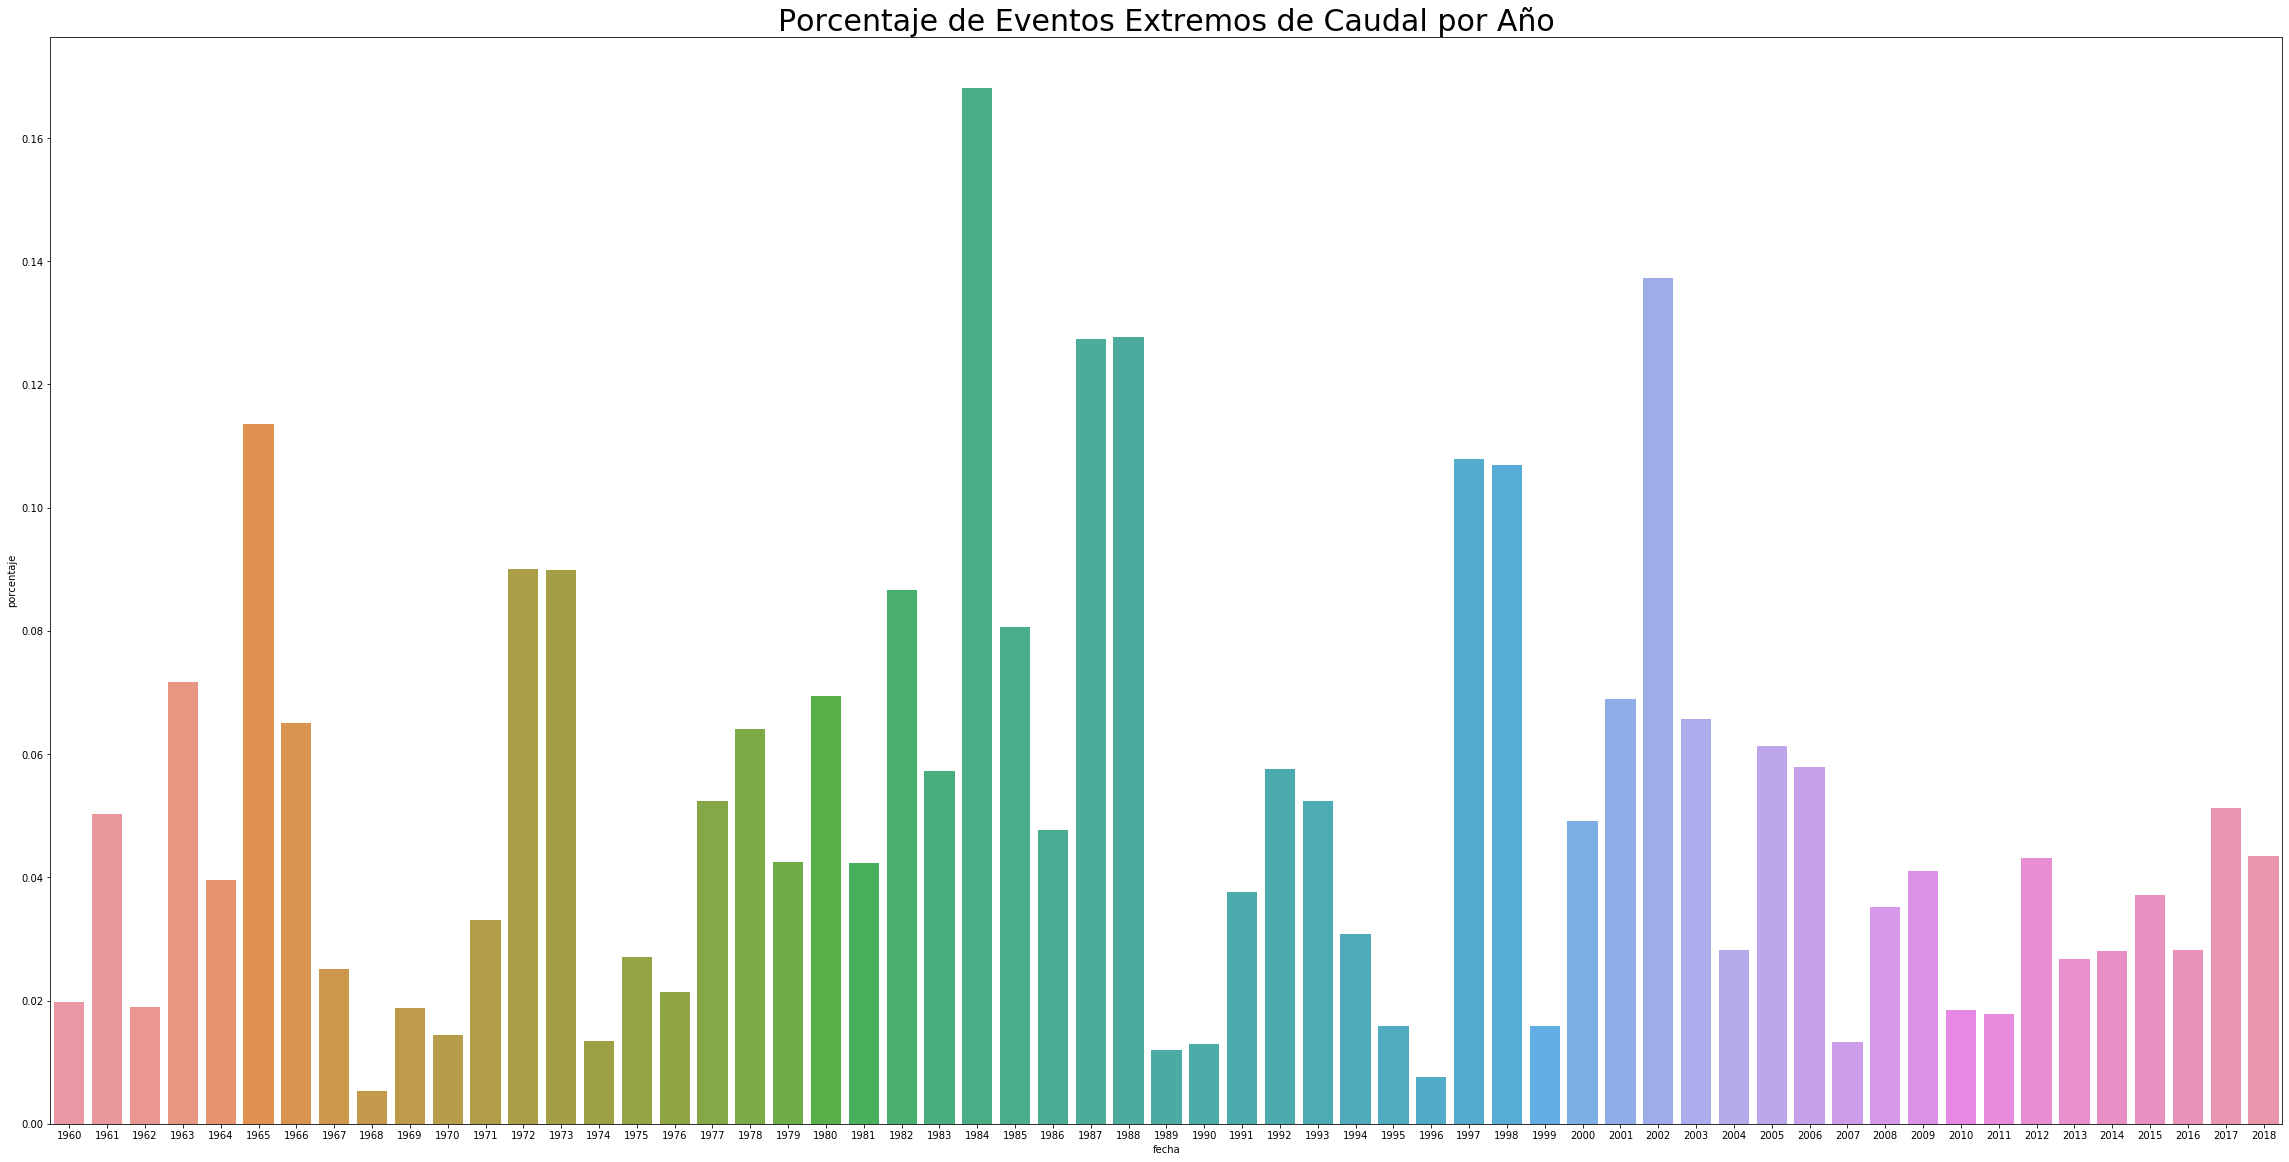

In [24]:
plt.figure(figsize=(40,20))
sns.barplot(x=plot_caudales.index,y='porcentaje',data=plot_caudales)
plt.title('Porcentaje de Eventos Extremos de Caudal por Año',fontsize=30)
plt.show()

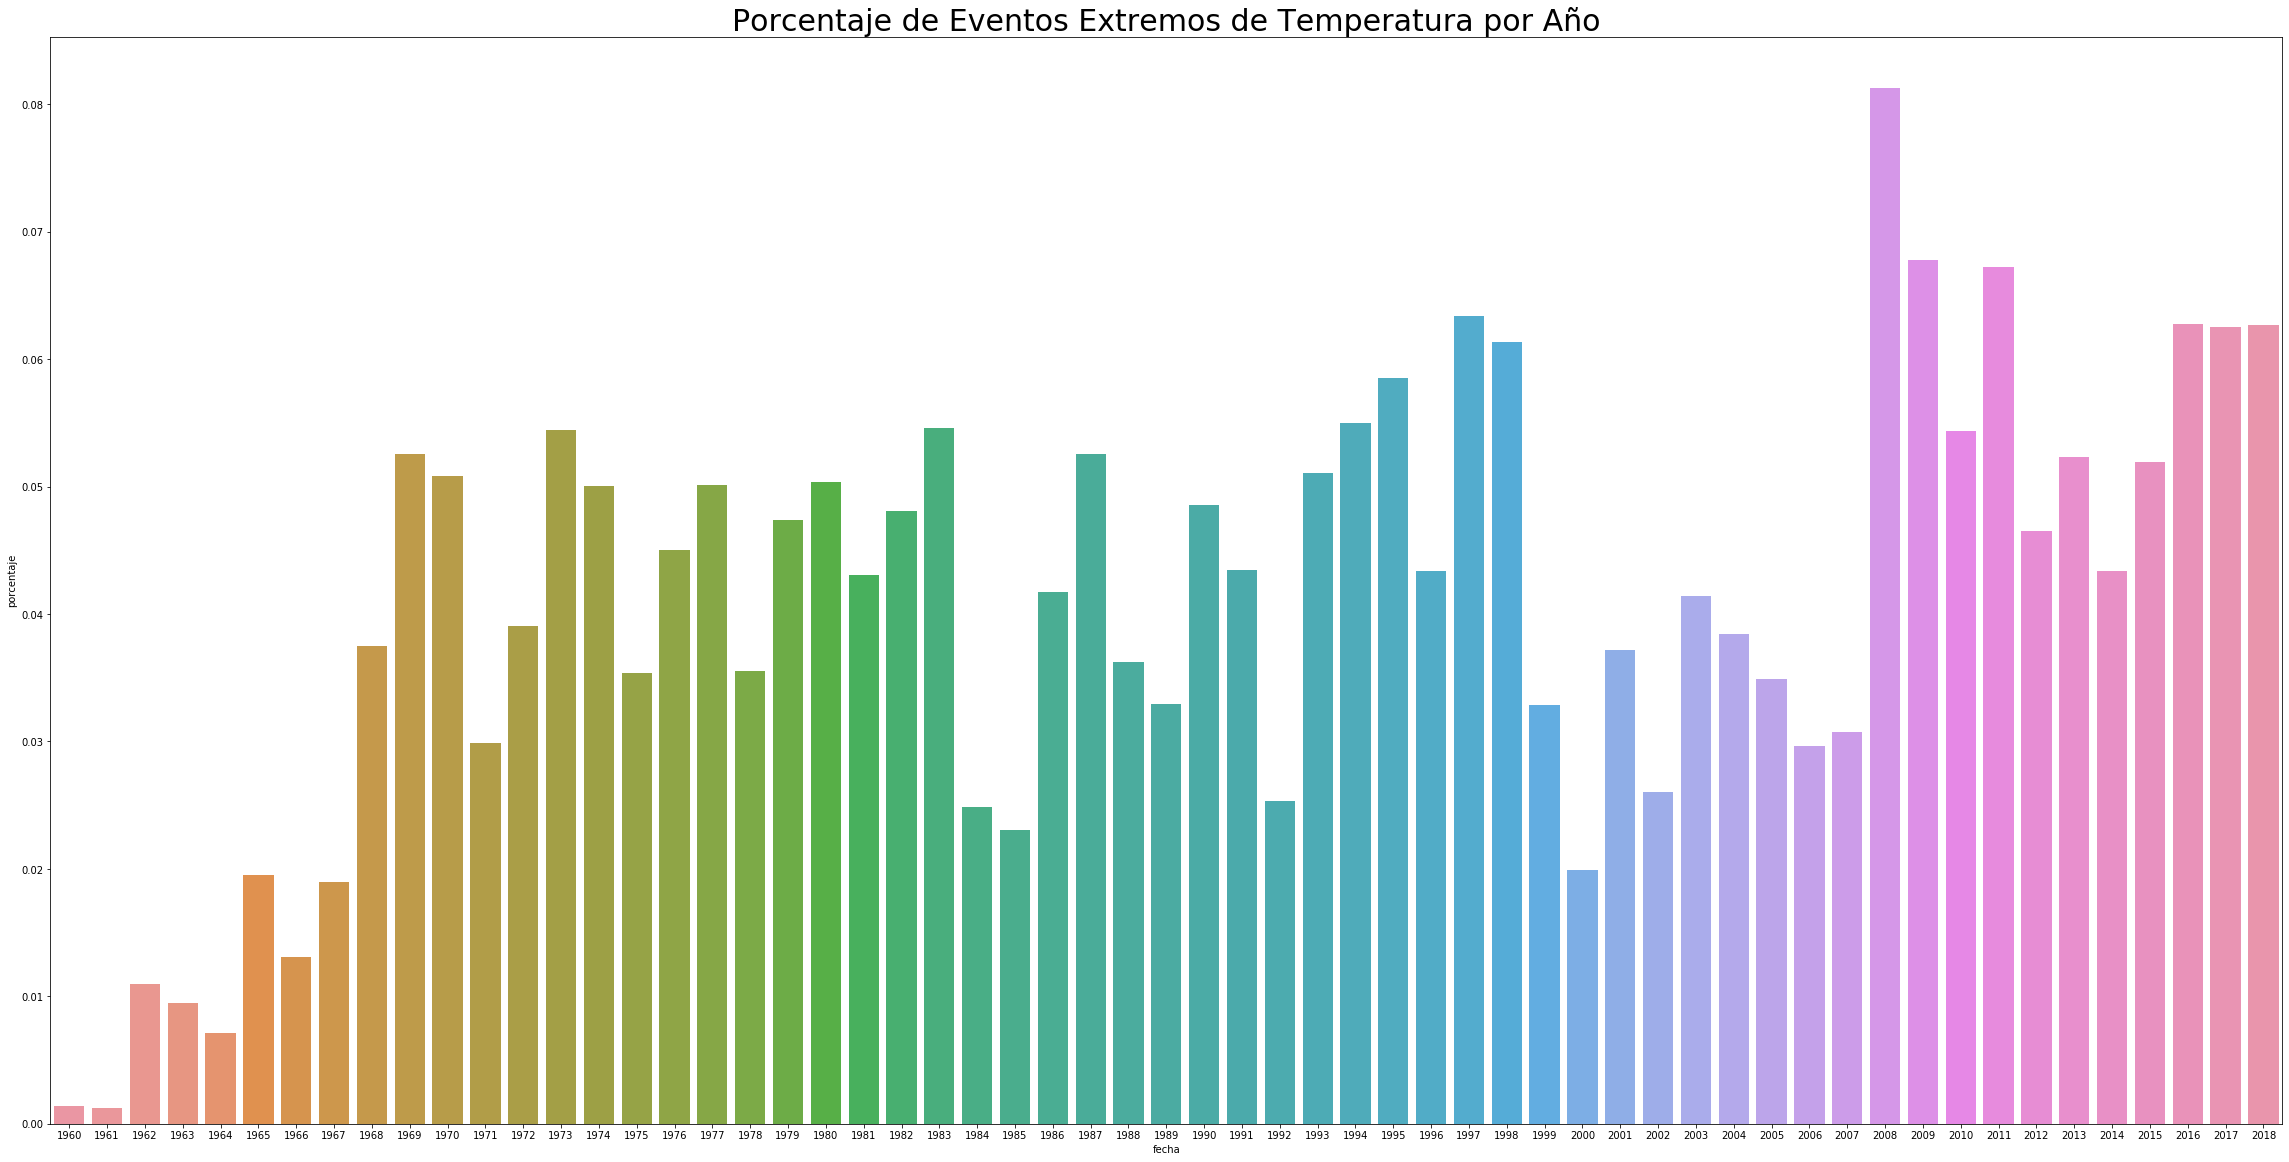

In [25]:
plt.figure(figsize=(40,20))
sns.barplot(x=plot_temp.index,y='porcentaje',data=plot_temp)
plt.title('Porcentaje de Eventos Extremos de Temperatura por Año',fontsize=30)
plt.show()

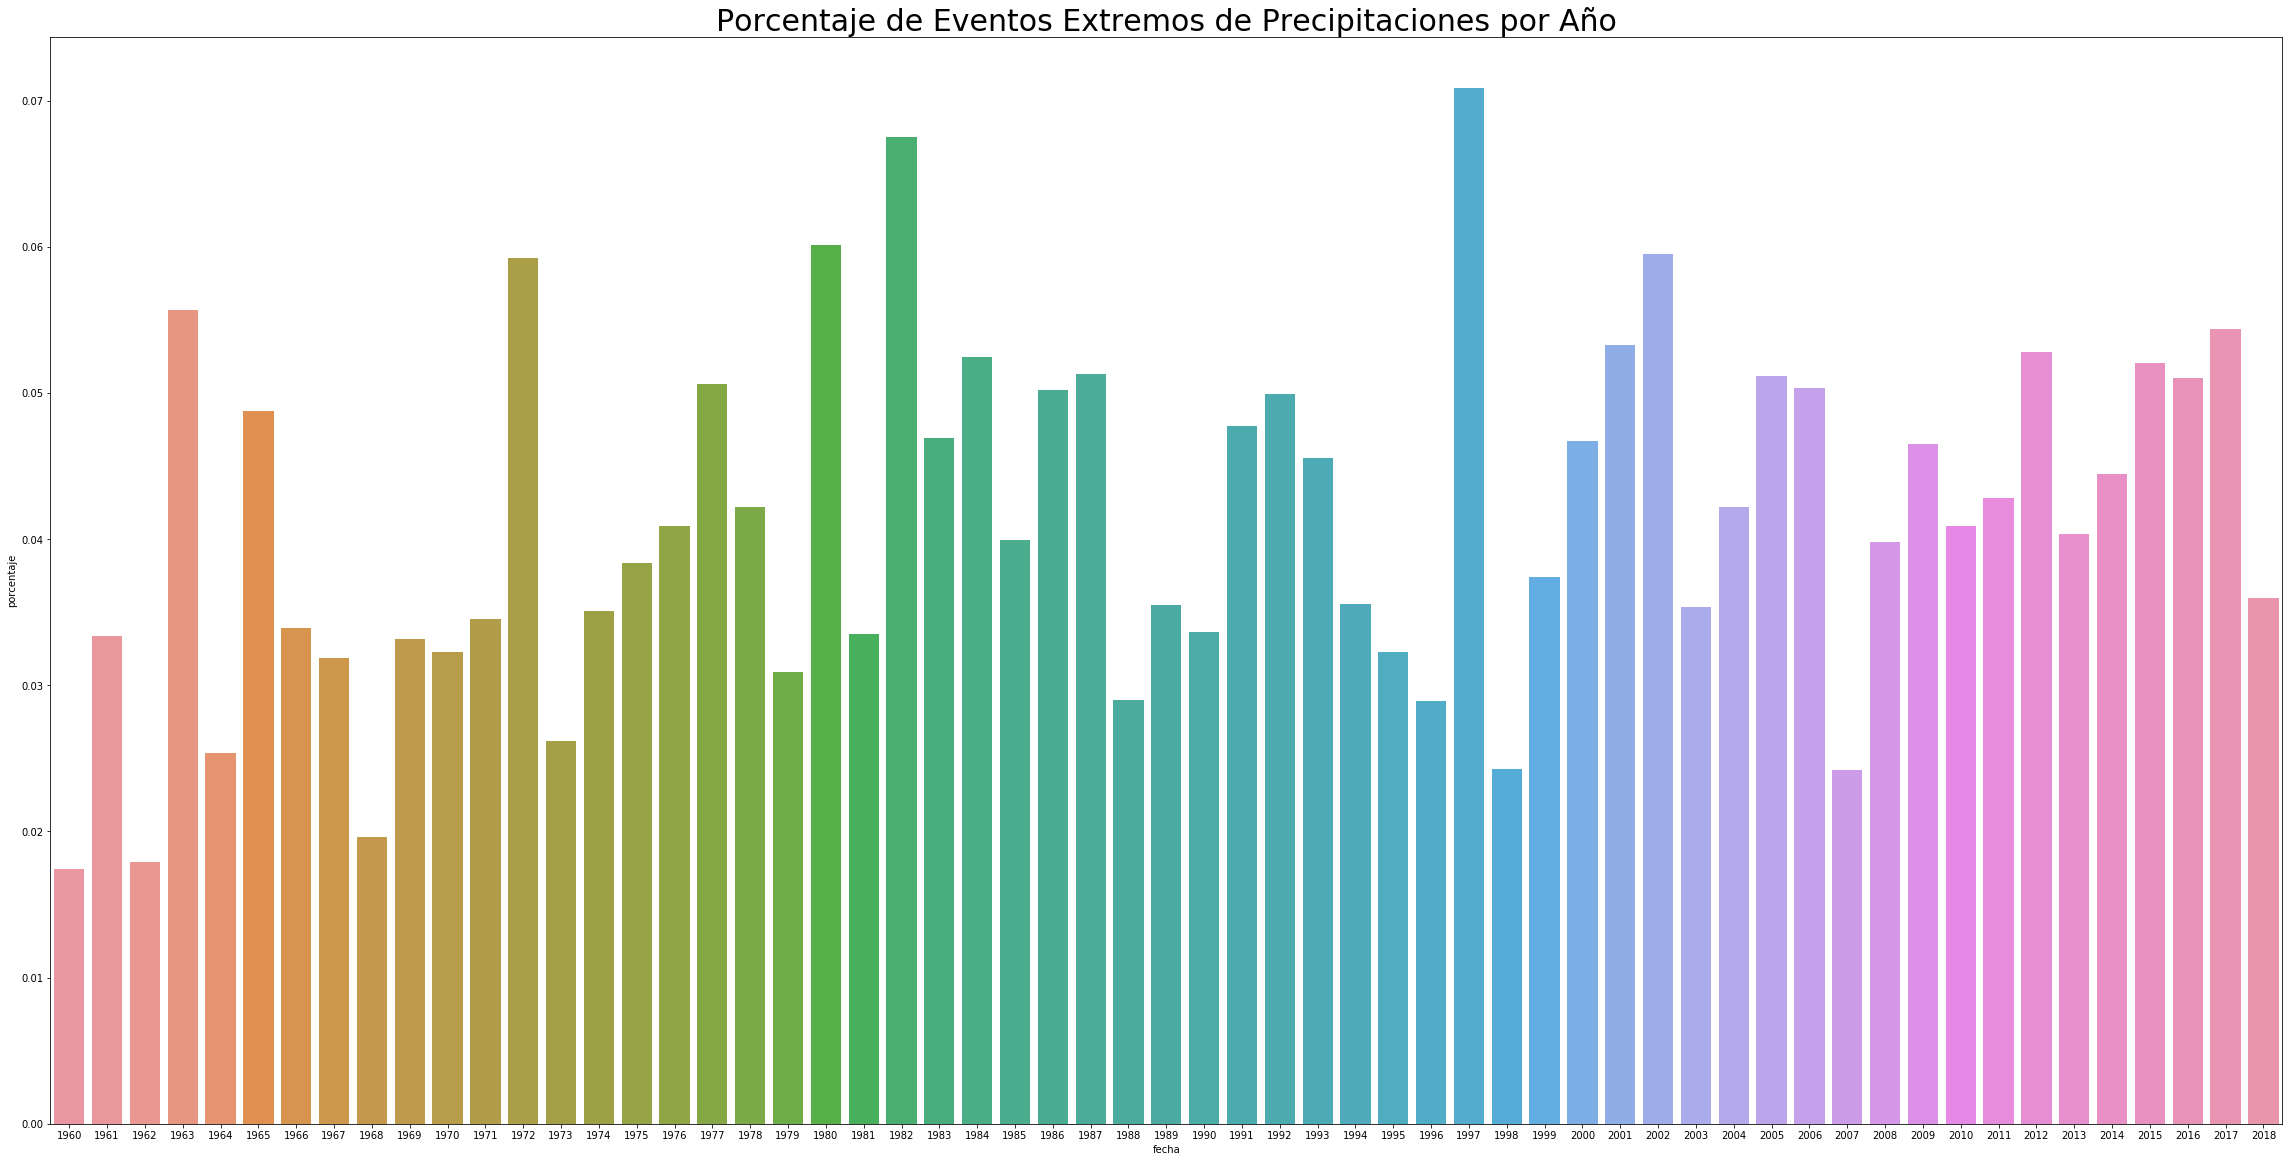

In [26]:
plt.figure(figsize=(40,20))
sns.barplot(x=plot_precip.index,y='porcentaje',data=plot_precip)
plt.title('Porcentaje de Eventos Extremos de Precipitaciones por Año',fontsize=30)
plt.show()

### Se ve una mayor cantidad porcentual de eventos extremos en el caso de la temperatura y precipitaciones. Para el caso del caudal, se observa que existe una tendencia al alza de eventos extremos de caudal, siendo estos mas recurrentes.

## 7. Prediccion Caudal Extremo

### Se utiliza una Regresión Logística al tener una variable target de 0 y 1. Se utilizan las variables de estación del año, la cuenca de los datos, precipitación y temperatura. 

### Se convierten las variables categoricas en features. 

### Debido a que no se tiene informacion de los dias inmediatamente anteriores para todos las cuencas, se utiliza la información del mismo día. Para utilizar el modelo en la práctica, se propone estimar las variables de precipitación y temperatura con anticipación, utilizando series de tiempo y variables meteorológicas. Con esto, el modelo podrá predecir con algunos días de anticipación si existirá un evento extremo o no.

In [60]:
columnas = ['fecha','precip_promedio','temp_max_promedio','estacion','caudal_extremo','nombre']
df_variables = df_con_var_extremos_corto[columnas].copy()

# Se convierten las variables categoricas.
df_estacion = pd.get_dummies(df_variables,drop_first=True)
df_sin_null = df_estacion.dropna()
df_shift = df_sin_null.set_index(keys='fecha')

In [61]:
df_variables.head()

,fecha,precip_promedio,temp_max_promedio,estacion,caudal_extremo,nombre
0,1960-01-06,0.0,NaN,verano,0,Rio Grande En Paloma 1
1,1960-03-27,0.0,NaN,otono,0,Rio Grande En Paloma 1
2,1960-05-07,0.0,NaN,otono,0,Rio Grande En Paloma 1
3,1960-06-30,0.0,NaN,invierno,0,Rio Grande En Paloma 1
4,1960-07-22,0.0,NaN,invierno,0,Rio Grande En Paloma 1


In [62]:
#df_shift.shift(periods=1)
#df_aux_shift = df_shift[['precip_promedio']].shift(periods=1)
#df_aux_shift.head(10)

In [63]:
df_sin_null.head()

,fecha,precip_promedio,temp_max_promedio,caudal_extremo,estacion_otono,estacion_primavera,estacion_verano,nombre_Estero Catemu Antes Junta Rio Aconcagua,nombre_Estero Chimbarongo En Puente El Huape,nombre_Estero Curipeumo En Lo Hernandez,...,nombre_Rio Tinguiririca En Los Olmos (Ca),nombre_Rio Toconce Antes Represa Sendos,nombre_Rio Tolten En Teodoro Schmidt,nombre_Rio Transito Antes Junta Rio Carmen,nombre_Rio Transito En Angostura Pinte,nombre_Rio Turbio En Varillar,nombre_Rio Uble En San Fabian N 2,nombre_Rio Vergara En Tijeral,nombre_Rio ÑUble En San Fabian,nombre_Zanjon De La Aguada Puente Particular
32,1965-08-19,0.0,21.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,1965-09-05,0.0,20.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,1965-10-06,0.0,22.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,1965-10-15,0.0,20.5,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,1965-12-21,0.0,28.5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.metrics import confusion_matrix, classification_report, roc_curve,roc_auc_score
LogReg = LogisticRegression()

In [66]:
# Se estandarizan las precipitaciones y temperatura
df_para_scale = df_sin_null.drop(['precip_promedio','temp_max_promedio'],axis=1).copy()
df_para_scale.reset_index(inplace=True,drop=True)
df_para_scale.head()

,fecha,caudal_extremo,estacion_otono,estacion_primavera,estacion_verano,nombre_Estero Catemu Antes Junta Rio Aconcagua,nombre_Estero Chimbarongo En Puente El Huape,nombre_Estero Curipeumo En Lo Hernandez,nombre_Estero Los Puercos En Puente Los Puercos,nombre_Estero Polpaico En Chicauma,...,nombre_Rio Tinguiririca En Los Olmos (Ca),nombre_Rio Toconce Antes Represa Sendos,nombre_Rio Tolten En Teodoro Schmidt,nombre_Rio Transito Antes Junta Rio Carmen,nombre_Rio Transito En Angostura Pinte,nombre_Rio Turbio En Varillar,nombre_Rio Uble En San Fabian N 2,nombre_Rio Vergara En Tijeral,nombre_Rio ÑUble En San Fabian,nombre_Zanjon De La Aguada Puente Particular
0,1965-08-19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1965-09-05,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1965-10-06,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1965-10-15,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1965-12-21,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
scale = preprocessing.StandardScaler()

In [68]:
df_scaled=scale.fit_transform(df_sin_null[['precip_promedio','temp_max_promedio']])

In [69]:
df_scaled_2 = pd.DataFrame(df_scaled,columns=['precip_promedio','temp_max_promedio'])
df_scaled_2.head()

,precip_promedio,temp_max_promedio
0,-0.261325,0.312366
1,-0.261325,0.175480
2,-0.261325,0.380808
3,-0.261325,0.175480
4,-0.261325,1.270567


In [70]:
df_standardize = df_scaled_2.join(df_para_scale)
y = df_standardize['caudal_extremo'].values
X = df_standardize.drop(['caudal_extremo','fecha'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [71]:
# Validacion Cruzada del modelo.

LogReg2 = LogisticRegression(C=0.00005,solver='lbfgs')
LogReg2.fit(X=X_train,y=y_train)
y_pred_prob = LogReg2.predict_proba(X_test)[:,1]
cv_scores = cross_val_score(LogReg2,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores)
print("Promedio Score: {}".format(np.average(cv_scores)))

[0.58047822 0.58391028 0.57867952 0.57993047 0.58038505]
Promedio Score: 0.5806767083711091


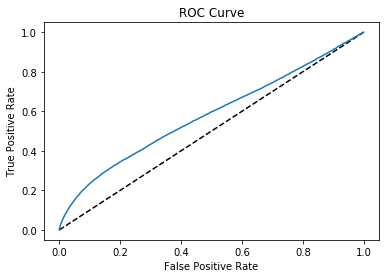

In [72]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### Esta curva representa cuan efectivo es el modelo. Mientras más grande sea el área debajo de la curva, será mejor el modelo.

In [73]:
# Variables más importantes.
LogReg2.coef_

array([[ 2.05940468e-01, -7.58738435e-02, -9.50589624e-03,
         1.94217850e-02,  3.18520526e-02,  2.30650764e-03,
         1.34723587e-03,  1.06095118e-03,  1.43043276e-03,
        -1.82329678e-03,  1.23275023e-03, -3.41254053e-03,
         2.11988048e-03,  2.72058708e-04,  1.77661135e-03,
        -2.44960965e-03, -8.62630749e-04, -9.06763594e-03,
        -9.15725407e-04, -2.52325235e-05,  2.45833715e-04,
        -5.83665060e-04, -6.41998016e-04, -7.99845153e-04,
        -1.42995655e-03, -8.93767684e-04, -1.31082031e-04,
        -2.22159769e-03, -2.42969315e-03, -3.74495617e-04,
        -1.57507528e-03, -2.78582201e-05,  1.09112619e-04,
        -3.59864798e-04, -1.94338642e-03,  9.15444901e-04,
        -5.31858418e-05, -3.24164950e-03, -3.47756232e-03,
        -5.77640655e-03,  2.36431768e-03,  1.20937411e-03,
         3.81467887e-03,  2.71308884e-03, -1.43912503e-03,
        -1.27209730e-03, -6.21024079e-04, -1.37205512e-03,
        -7.57913878e-05, -1.76292109e-04,  1.22654054e-0

In [74]:
y_pred = LogReg2.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[357942     57]
 [ 18899     46]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    357999
           1       0.45      0.00      0.00     18945

    accuracy                           0.95    376944
   macro avg       0.70      0.50      0.49    376944
weighted avg       0.92      0.95      0.93    376944



## 8. Analisis de Resultados

## a.
### El modelo tiene un Score del 58% que se obtiene utilizando validacion cruzada y la métrica AUC. Se utiliza esta metrica porque combina tanto la precisión como el recall del modelo de regresión logística. Esto quiere decir que ve como el modelo acierta los tanto los falsos positivos como los falsos negativos.

### Las variables más importantes para el modelo son las variables númericas de temperatura y precipitación. En primer lugar con la precipitación.

### La cantidad de falsos positivos es muy alta. Lo que quiere decir que el modelo predice dias extremos que realmente no lo son.  Esto muestra que por el momento el modelo no es lo suficientemente certero.

## b. 
### El modelo está capturando sólo el 45% de los eventos extremos. Por lo que aún existe una brecha del 25% para llegar a ese 70%. Por el momento, el modelo no es útil.

##### Uso de xgboost

In [75]:
#import xgboost as xgb

In [76]:
#xg_cl = xgb.XGBClassifier(n_estimators=50,objective='binary:logistic'

In [77]:
#xg_cl.fit(X_train, y_train)

In [78]:
#preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
#accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
#print("accuracy: %f" % (accuracy))

In [79]:
#churn_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

In [80]:
'''
params = {"objective":"reg:logistic", "max_depth":3,'learning_rate':0.5,'n_estimators':50}
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])
'''

'\nparams = {"objective":"reg:logistic", "max_depth":3,\'learning_rate\':0.5,\'n_estimators\':50}\ncv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="auc", as_pandas=True, seed=123)\n\n# Print cv_results\nprint(cv_results)\n\n# Print the AUC\nprint((cv_results["test-auc-mean"]).iloc[-1])\n'